In [68]:
import numpy as np                       
import pandas as pd                     
import seaborn as sns                  
import matplotlib.pyplot as plt         
import scipy
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers
from scikeras.wrappers import KerasClassifier

In [2]:
airline_train_data = pd.read_csv('train.csv')
airline_train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
airline_test_data = pd.read_csv('test.csv')
airline_test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


# Exploratory Data Analysis(EDA)

In [4]:
# First two columns - unnamed and Id are not useful, so we'll drop them
train_data = airline_train_data.drop(['Unnamed: 0', 'id'], axis = 1)
test_data = airline_test_data.drop(['Unnamed: 0', 'id'], axis = 1)
train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [6]:
train_data.duplicated().sum()

0

Observations on training Data:

1. Out of 23 columns, 5 are object type features. Others are numerical type (int,float) features.
2. All features have 103904 values except Arrival Delay in Minutes(103594 values). It has 310 null values
3. There are no duplicate rows in training data

In [7]:
# Replace Null values with the mean for Arrival Delay in Minutes feature in training data
arrival_delay_mean = train_data['Arrival Delay in Minutes'].mean()
print("Mean of Arrival Delay in Minutes: ", arrival_delay_mean)
train_data['Arrival Delay in Minutes'].fillna(arrival_delay_mean, inplace = True)
train_data['Arrival Delay in Minutes'].info()

Mean of Arrival Delay in Minutes:  15.178678301832152
<class 'pandas.core.series.Series'>
RangeIndex: 103904 entries, 0 to 103903
Series name: Arrival Delay in Minutes
Non-Null Count   Dtype  
--------------   -----  
103904 non-null  float64
dtypes: float64(1)
memory usage: 811.9 KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [9]:
test_data.duplicated().sum()

0

Observations on Test Data:

1. Out of 23 columns, 5 are object type features. Others are numerical type (int,float) features.
2. All features have 25976 non-null values except Arrival Delay in Minutes(25893 values). It has 83 null values.
3. There are no duplicate rows in test data.

In [10]:
# Replace Null values with the mean for Arrival Delay in Minutes feature in test data
arrival_delay_mean_test = test_data['Arrival Delay in Minutes'].mean()
print("Mean of Arrival Delay in Minutes: ", arrival_delay_mean_test)
test_data['Arrival Delay in Minutes'].fillna(arrival_delay_mean_test, inplace = True)
test_data['Arrival Delay in Minutes'].info()

Mean of Arrival Delay in Minutes:  14.74085660217047
<class 'pandas.core.series.Series'>
RangeIndex: 25976 entries, 0 to 25975
Series name: Arrival Delay in Minutes
Non-Null Count  Dtype  
--------------  -----  
25976 non-null  float64
dtypes: float64(1)
memory usage: 203.1 KB


neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


(array([0, 1]),
 [Text(0, 0, 'neutral or dissatisfied'), Text(1, 0, 'satisfied')])

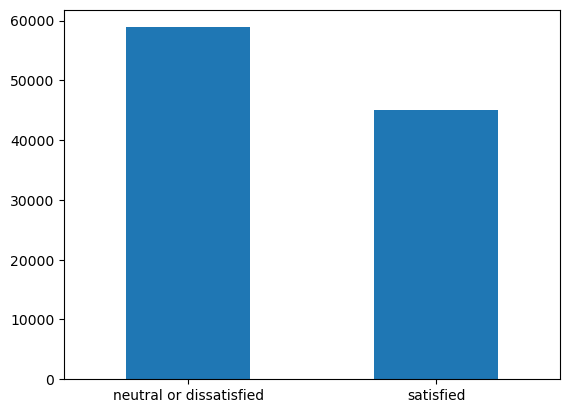

In [11]:
satisfaction_counts = train_data['satisfaction'].value_counts()
print(satisfaction_counts)
satisfaction_counts.plot.bar()
plt.xticks(rotation=360)

1. Training data is slightly imbalanced. The labels 'Satisfied' has 45025 people and 'Neutral or Dissatisfied' has 58879 people, i.e 43.33% people are satisfied and 56.67% people are Neutral or Dissatisfied.

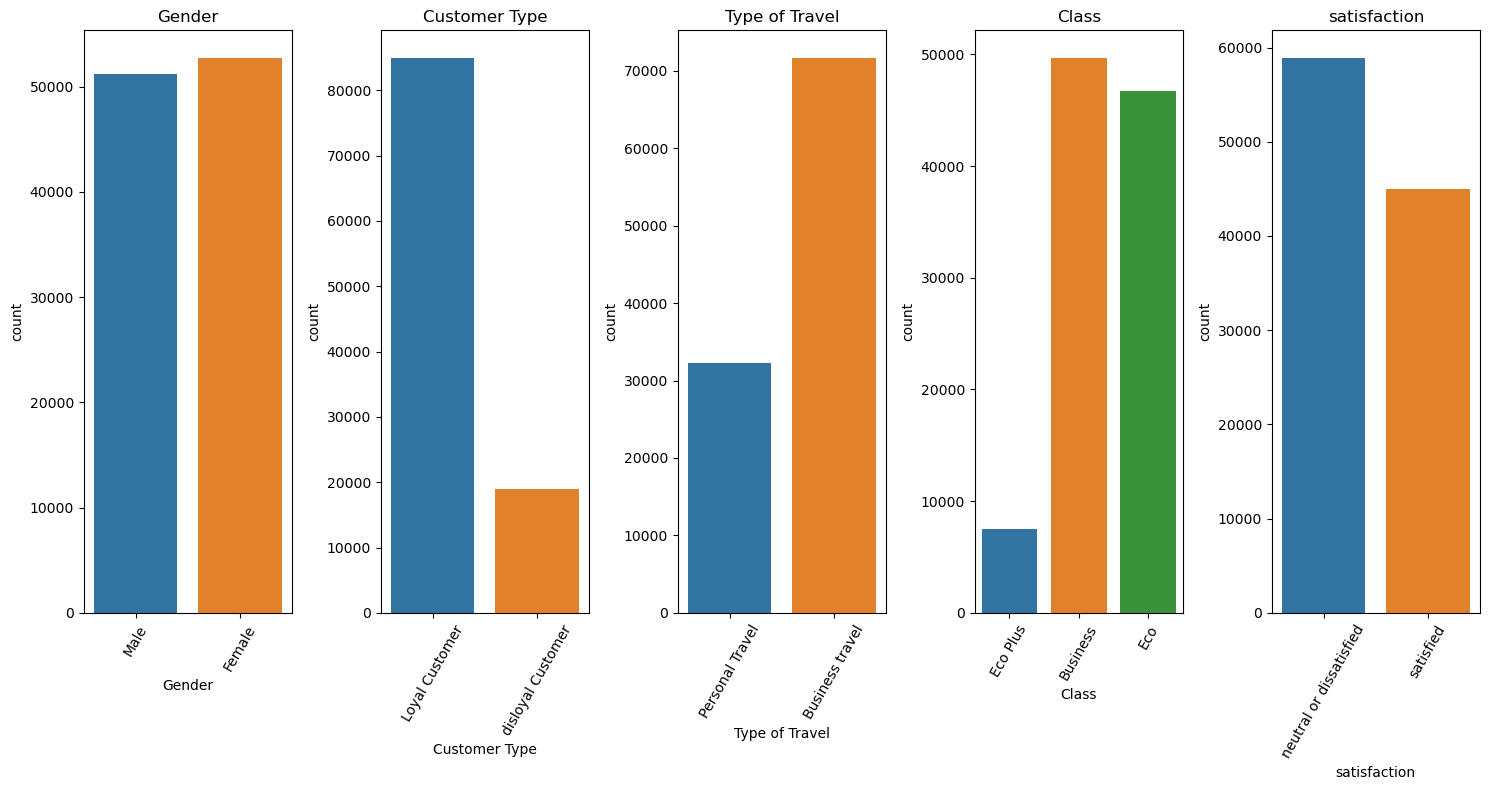

In [12]:
# Plots for Categorical data - He're we are plotting the count of unique values for each categorical feature
categorical_train_data = train_data.select_dtypes(['object'])

fig, axes = plt.subplots(1, 5, figsize=(15, 8))
for i, column in enumerate(categorical_train_data.columns):
    ax = axes[i]
    sns.countplot(data=categorical_train_data, x=column, ax=ax)
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=60)

    
plt.tight_layout()
plt.show()

In [13]:
# He're we are plotting the count of unique values for each numerical feature with non-continuous values
numeric_features = [
    "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location",
    "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service",
    "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"
]
# Unique values of all features
train_data.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            446
Arrival Delay in Minutes              456
satisfaction                            2
dtype: int64

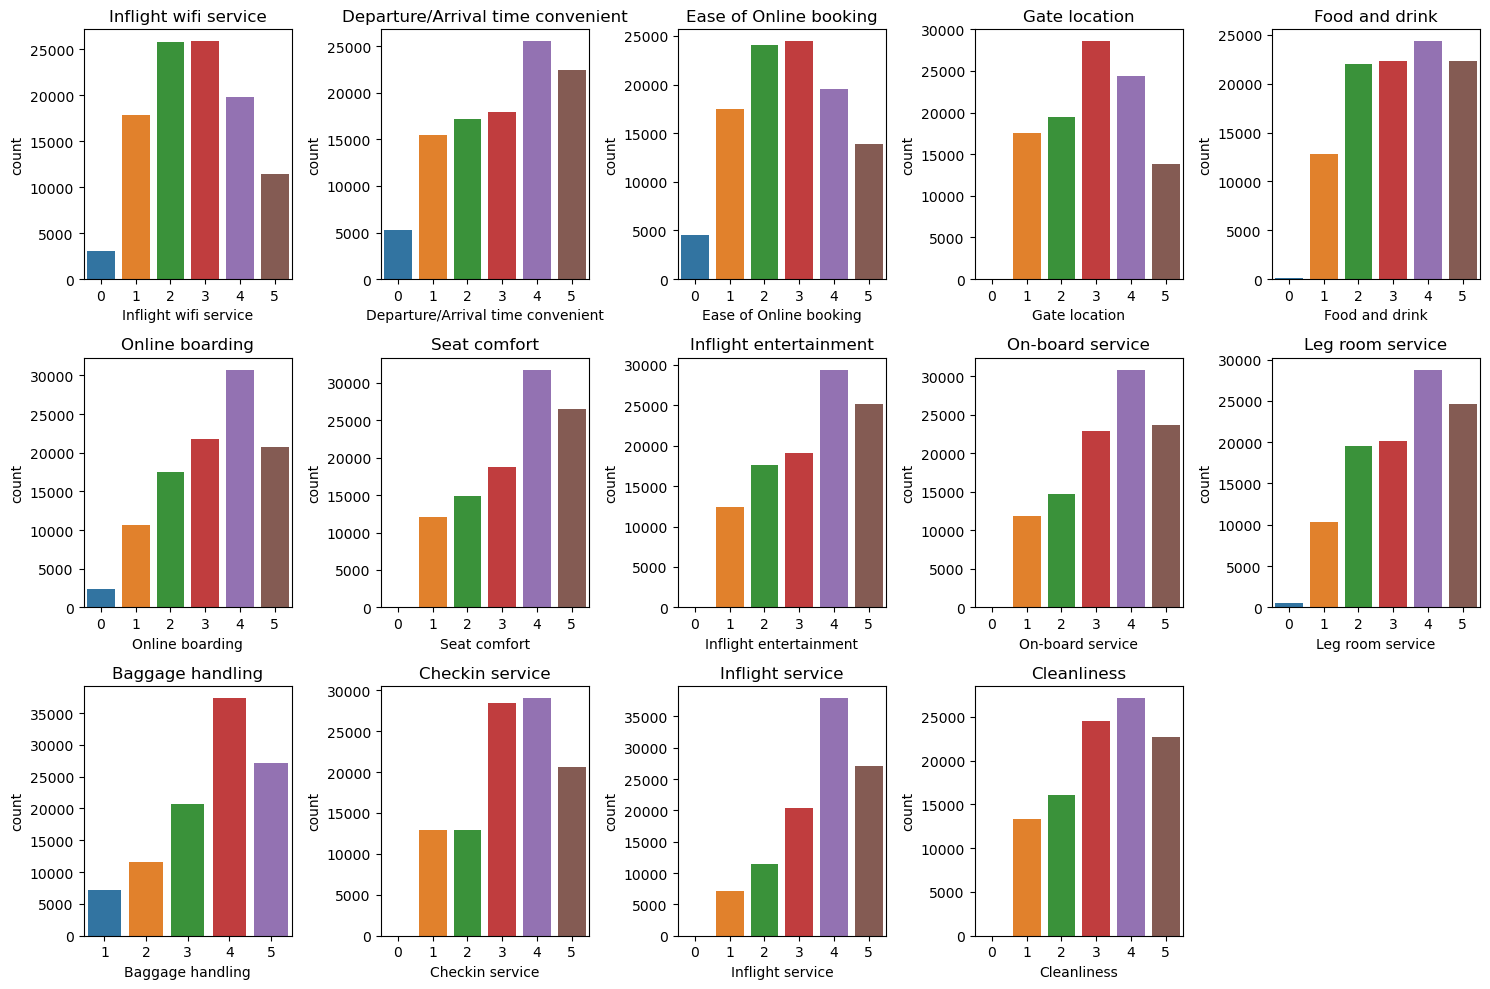

In [14]:
# We first plot for features with non continuous values
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for i, column in enumerate(numeric_features):
    row = i // 5
    col = i % 5
    
    ax = axes[row, col]
    ax.set_title(column)
    sns.countplot(data=train_data, x=column, ax=ax)
fig.delaxes(axes[2,4])
plt.tight_layout()
plt.show()

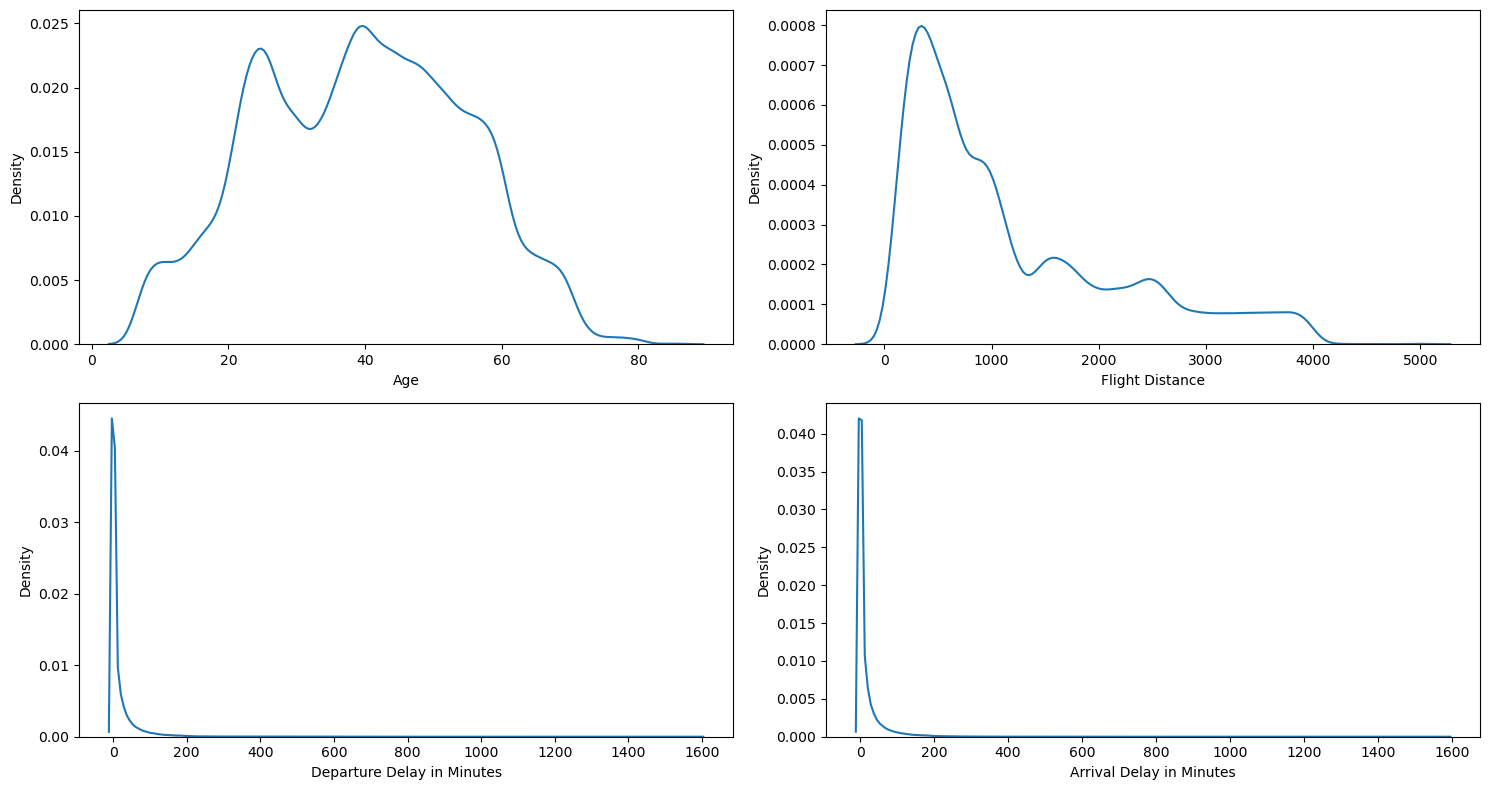

In [15]:
# Plot for features with continuous values
numeric = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.kdeplot(data=train_data, x=column, ax=ax)

plt.tight_layout()
plt.show()

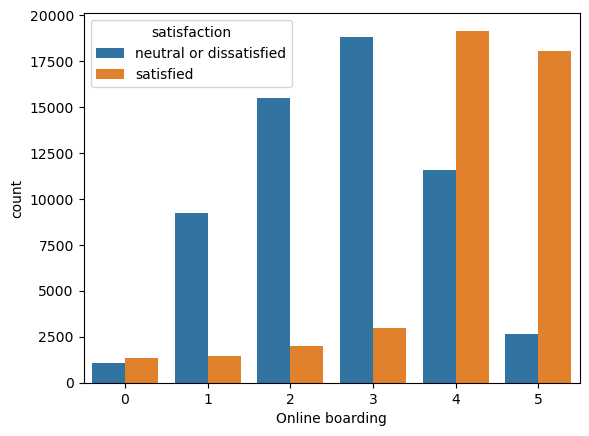

In [16]:
sns.countplot(x='Online boarding', hue='satisfaction', data=train_data)
plt.show()

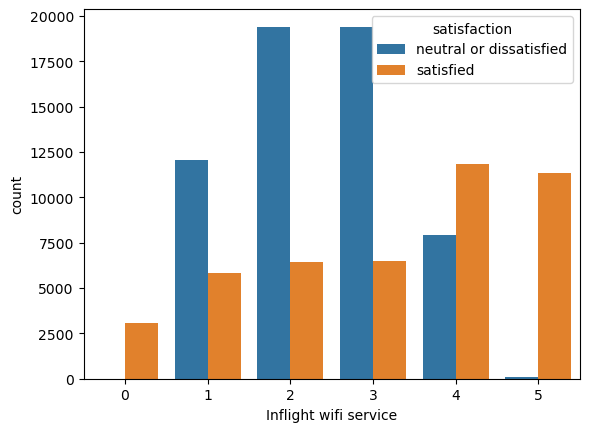

In [17]:
sns.countplot(x='Inflight wifi service', hue='satisfaction', data=train_data)
plt.show()

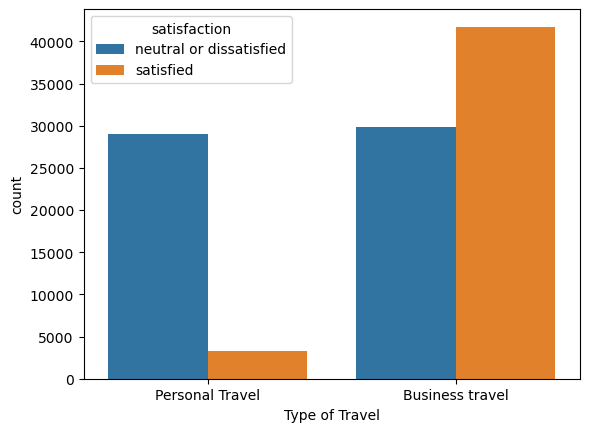

In [18]:
sns.countplot(x='Type of Travel', hue='satisfaction', data=train_data)
plt.show()

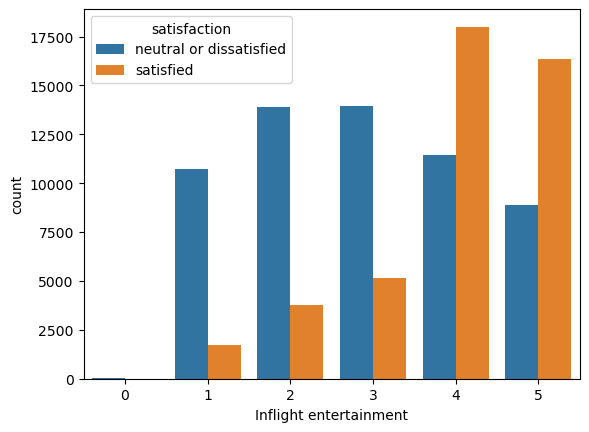

In [19]:
sns.countplot(x='Inflight entertainment', hue='satisfaction', data=train_data)
plt.show()

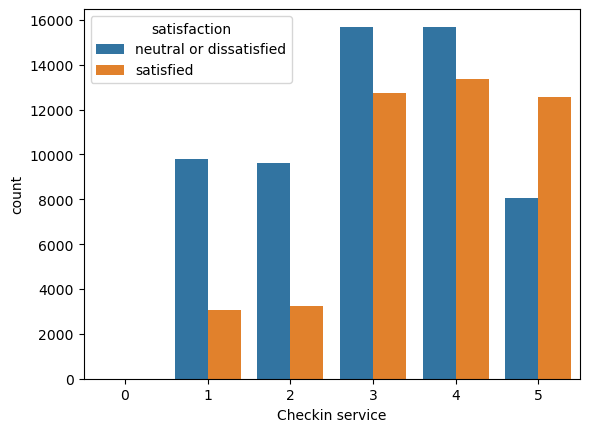

In [20]:
sns.countplot(x='Checkin service', hue='satisfaction', data=train_data)
plt.show()

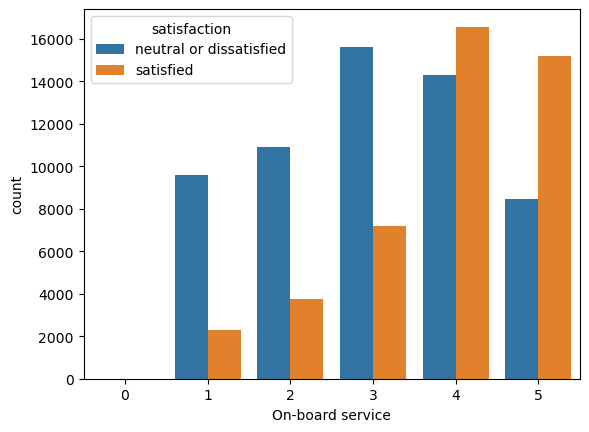

In [21]:
sns.countplot(x='On-board service', hue='satisfaction', data=train_data)
plt.show()

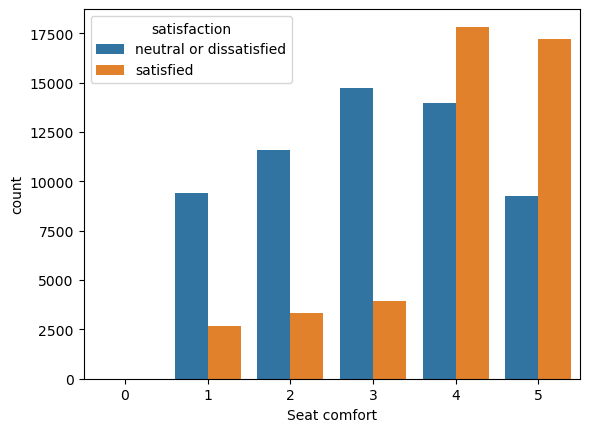

In [22]:
sns.countplot(x='Seat comfort', hue='satisfaction', data=train_data)
plt.show()

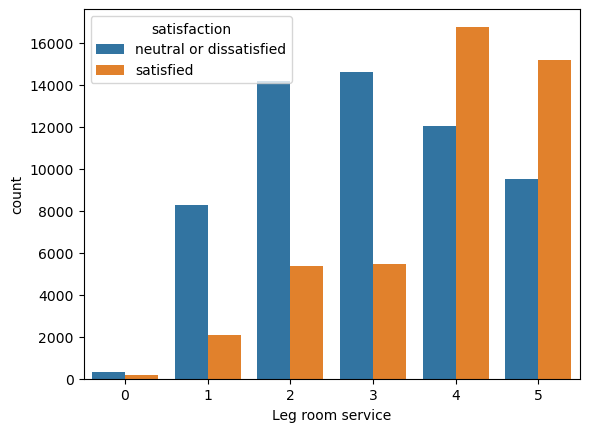

In [23]:
sns.countplot(x='Leg room service', hue='satisfaction', data=train_data)
plt.show()

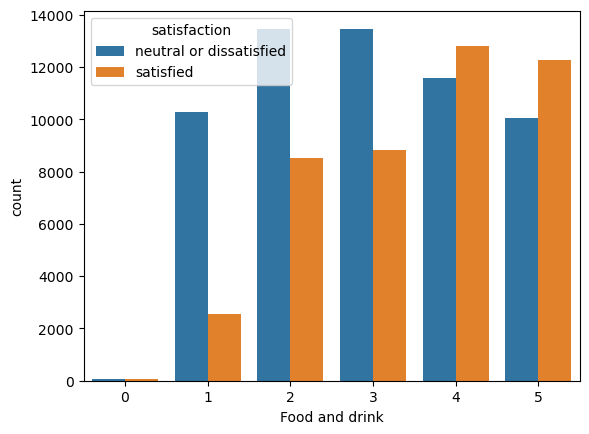

In [24]:
sns.countplot(x='Food and drink', hue='satisfaction', data=train_data)
plt.show()

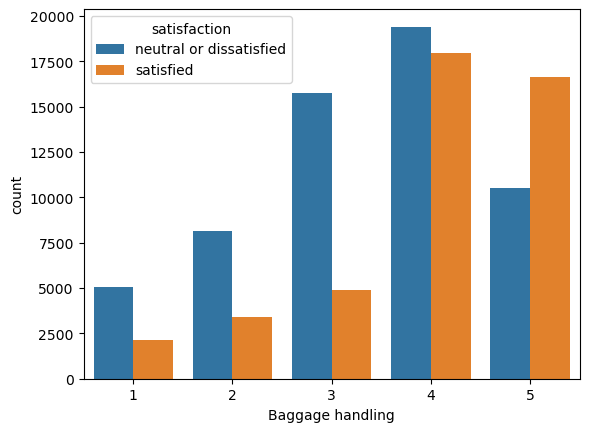

In [25]:
sns.countplot(x='Baggage handling', hue='satisfaction', data=train_data)
plt.show()

Text(0.5, 1.0, 'Training Data correlations')

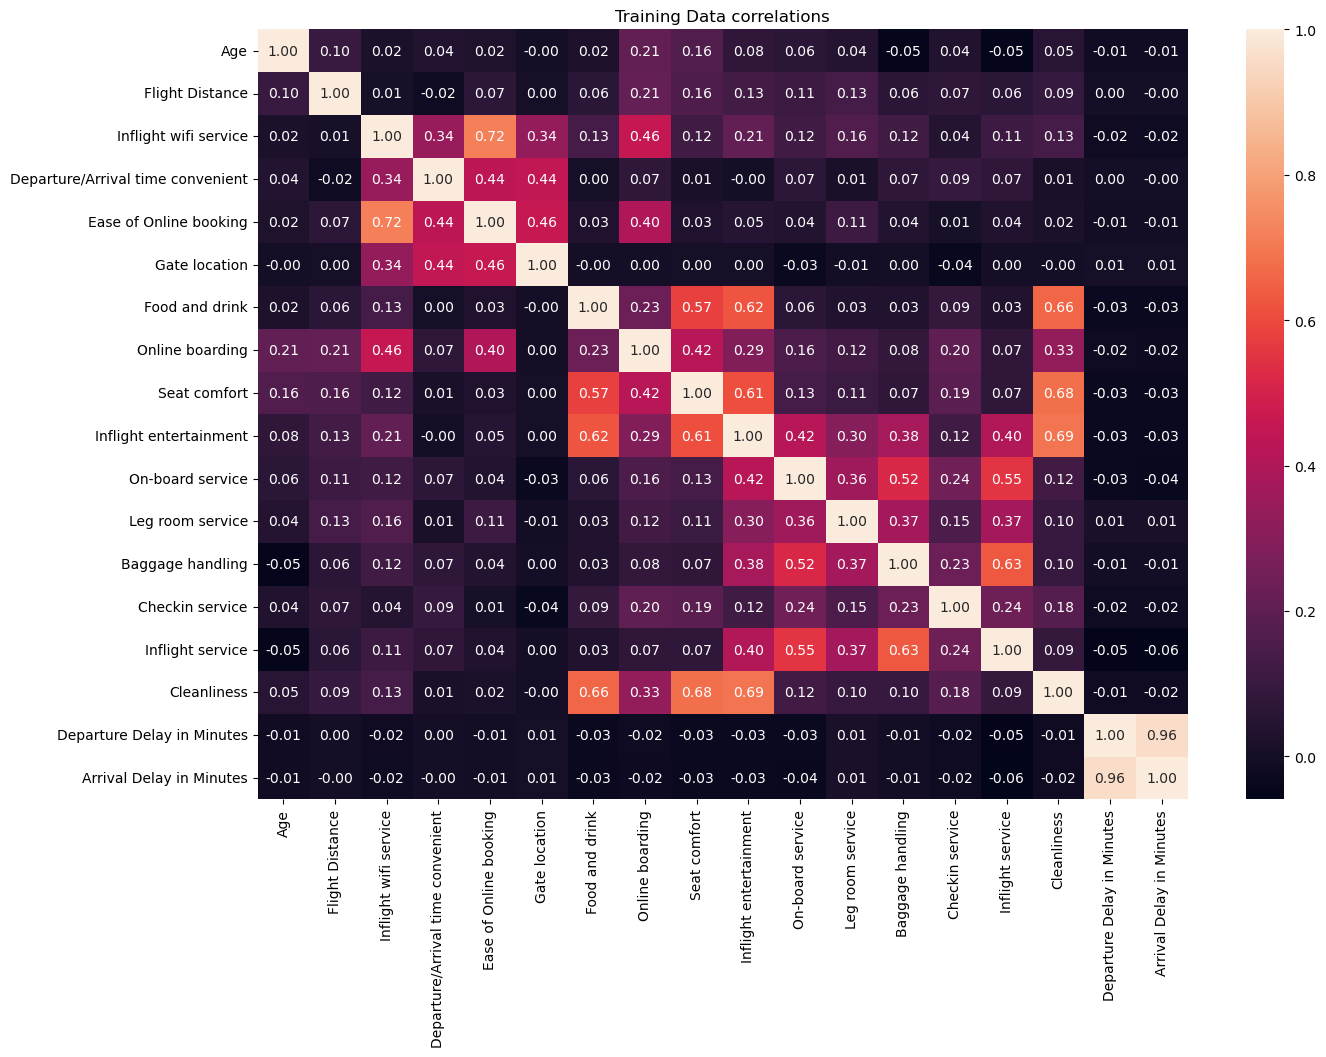

In [26]:
# Plot heatmap to understand the correlation between features
correlation_train_features = train_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_train_features,annot=True,fmt='.2f')
plt.title("Training Data correlations")

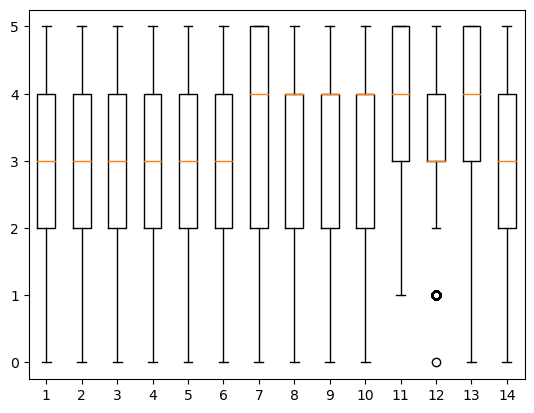

In [27]:
# Boxplot for all Nominal features
plt.boxplot(train_data[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]);

In [28]:
# Outliers for Checkin Service
print(train_data['Checkin service'].value_counts())


4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64


In [29]:
# Since the number of outliers is extremely small(1), we will remove it
train_data.drop(train_data[train_data['Checkin service']==0].index,inplace=True)


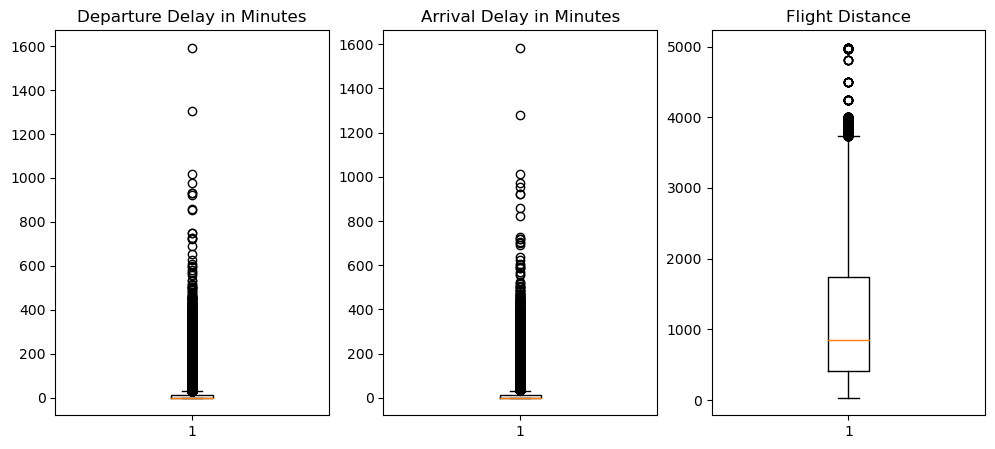

In [30]:
plt.figure(1,figsize=(12,5))
plt.subplot(131)
plt.boxplot(train_data['Departure Delay in Minutes'])
plt.title('Departure Delay in Minutes')
plt.subplot(132)
plt.boxplot(train_data['Arrival Delay in Minutes'])
plt.title('Arrival Delay in Minutes');
plt.subplot(133)
plt.boxplot(train_data['Flight Distance']);
plt.title('Flight Distance');

In [31]:
# Detecting the Outliers Using IQR(Inter Quartile Range)
Q1_dep = train_data['Departure Delay in Minutes'].quantile(0.25)
Q3_dep = train_data['Departure Delay in Minutes'].quantile(0.75)
IQR_dep = Q3_dep - Q1_dep
lower_dep = Q1_dep - 1.5*IQR_dep
upper_dep = Q3_dep + 1.5*IQR_dep

Q1_dist = train_data['Flight Distance'].quantile(0.25)
Q3_dist = train_data['Flight Distance'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
lower_dist = Q1_dist - 1.5*IQR_dist
upper_dist = Q3_dist + 1.5*IQR_dist

# Outlier treatment for Departure Delay in Minutes
train_data.loc[train_data['Departure Delay in Minutes']>upper_dep,'Departure Delay in Minutes'] = upper_dep

# Outlier treatment for Flight distance
train_data.loc[train_data['Flight Distance']>upper_dist,'Flight Distance'] = upper_dist

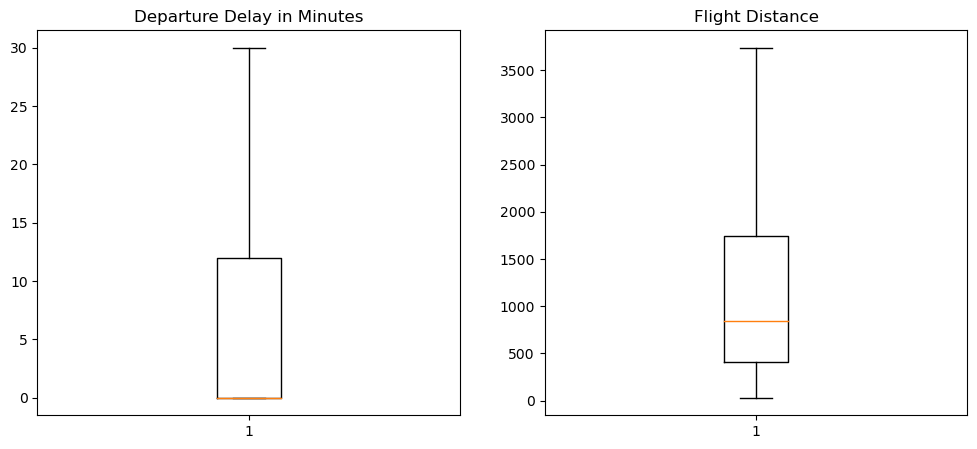

In [32]:
plt.figure(1,figsize=(12,5))
plt.subplot(121)
plt.boxplot(train_data['Departure Delay in Minutes'])
plt.title('Departure Delay in Minutes')
plt.subplot(122)
plt.boxplot(train_data['Flight Distance'])
plt.title('Flight Distance');

# Data Preprocessing

In [33]:
le = LabelEncoder()
train_data['satisfaction'] = le.fit_transform(train_data['satisfaction'])
test_data['satisfaction'] = le.fit_transform(test_data['satisfaction'])
train_data['satisfaction']

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103903, dtype: int64

In [34]:
# For Train Data
encoder = OneHotEncoder()
columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(train_data[columns_to_encode])
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])
train_data.drop(columns_to_encode, axis=1, inplace=True)
train_data[encoded_column_names] = encoded_columns
train_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460.0,3,4,3,1,5,3,5,5,...,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25,235.0,3,2,3,3,1,3,1,1,...,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26,1142.0,2,2,2,2,5,5,5,5,...,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25,562.0,2,5,5,5,2,2,2,2,...,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,61,214.0,3,3,3,3,4,5,5,3,...,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [35]:
# For features with only 2 labels, drop one column as the other one has both values 0 and 1.
train_data.drop(['Gender_Male','Customer Type_disloyal Customer','Type of Travel_Personal Travel','Arrival Delay in Minutes'],axis=1,inplace=True)
train_data.rename(columns={'Gender_Female':'Gender','Customer Type_Loyal Customer':'Customer Type','Type of Travel_Business travel':'Type of Travel'},inplace=True)
train_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460.0,3,4,3,1,5,3,5,5,...,5,5,25,0,0.0,1.0,0.0,0.0,0.0,1.0
1,25,235.0,3,2,3,3,1,3,1,1,...,4,1,1,0,0.0,0.0,1.0,1.0,0.0,0.0
2,26,1142.0,2,2,2,2,5,5,5,5,...,4,5,0,1,1.0,1.0,1.0,1.0,0.0,0.0
3,25,562.0,2,5,5,5,2,2,2,2,...,4,2,11,0,1.0,1.0,1.0,1.0,0.0,0.0
4,61,214.0,3,3,3,3,4,5,5,3,...,3,3,0,1,0.0,1.0,1.0,1.0,0.0,0.0


In [36]:
# For Test Data
encoder = OneHotEncoder()
columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(test_data[columns_to_encode])
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])
test_data.drop(columns_to_encode, axis=1, inplace=True)
test_data[encoded_column_names] = encoded_columns
test_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,36,2863,1,1,3,1,5,4,5,4,...,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,20,192,2,0,2,4,2,2,2,2,...,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,44,3377,0,0,0,2,3,4,4,1,...,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,49,1182,2,3,4,3,4,1,2,2,...,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [37]:
# For features with only 2 labels instead of keeping 2 columns it is better to keep only one column which contain 0 or 1
test_data.drop(['Gender_Male','Customer Type_disloyal Customer','Type of Travel_Personal Travel','Arrival Delay in Minutes'],axis=1,inplace=True)
test_data.rename(columns={'Gender_Female':'Gender','Customer Type_Loyal Customer':'Customer Type','Type of Travel_Business travel':'Type of Travel'},inplace=True)
test_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,5,5,50,1,1.0,1.0,1.0,0.0,1.0,0.0
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0,1,1.0,1.0,1.0,1.0,0.0,0.0
2,20,192,2,0,2,4,2,2,2,2,...,2,2,0,0,0.0,0.0,1.0,0.0,1.0,0.0
3,44,3377,0,0,0,2,3,4,4,1,...,1,4,0,1,0.0,1.0,1.0,1.0,0.0,0.0
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0,1,1.0,1.0,1.0,0.0,1.0,0.0


In [38]:
# Standardize all features in train data
train_data_initial = train_data.copy()
columns_to_scale = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
                    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
                    'Seat comfort', 'Inflight entertainment', 'On-board service',
                    'Leg room service', 'Baggage handling', 'Checkin service',
                    'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
                    'Gender', 'Customer Type', 'Type of Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']
scaler = StandardScaler()
scaled_values = scaler.fit_transform(train_data[columns_to_scale])
train_data[columns_to_scale] = scaled_values
train_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.745269,-0.734872,0.203588,0.616186,0.173793,-1.547319,1.352260,-0.185526,1.183107,1.231704,...,1.156437,1.305879,1.568467,0,-1.015021,0.472769,-1.490603,-0.956897,-0.904334,3.586757
1,-0.951353,-0.962577,0.203588,-0.695235,0.173793,0.018110,-1.656356,-0.185526,-1.849391,-1.769070,...,0.305832,-1.742360,-0.569875,0,-1.015021,-2.115196,0.670869,1.045045,-0.904334,-0.278803
2,-0.885194,-0.044674,-0.549524,-0.695235,-0.541048,-0.764605,1.352260,1.296497,1.183107,1.231704,...,0.305832,1.305879,-0.658973,1,0.985201,0.472769,0.670869,1.045045,-0.904334,-0.278803
3,-0.951353,-0.631646,-0.549524,1.271896,1.603475,1.583538,-0.904202,-0.926537,-1.091267,-1.018876,...,0.305832,-0.980300,0.321101,0,0.985201,0.472769,0.670869,1.045045,-0.904334,-0.278803
4,1.430394,-0.983829,0.203588,-0.039525,0.173793,0.018110,0.600106,1.296497,1.183107,-0.268683,...,-0.544772,-0.218241,-0.658973,1,-1.015021,0.472769,0.670869,1.045045,-0.904334,-0.278803


In [39]:
# Standardize all features in test data
scaled_values = scaler.fit_transform(test_data[columns_to_scale])
test_data[columns_to_scale] = scaled_values
test_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.817887,-1.035171,1.703853,0.621641,0.172143,0.797831,-0.161739,0.544692,-0.340303,1.227138,...,1.144063,1.298998,0.953810,1,0.985932,0.476040,0.663378,-0.962736,1.116370,-0.282275
1,-0.239238,1.671443,-1.291598,-1.334871,0.172143,-1.542065,1.340348,0.544692,1.174774,0.479907,...,0.297077,1.298998,-0.382286,1,0.985932,0.476040,0.663378,1.038707,-0.895761,-0.282275
2,-1.296363,-1.003128,-0.542735,-1.987042,-0.535609,0.797831,-0.912783,-0.930768,-1.097842,-1.014556,...,-1.396893,-0.974927,-0.382286,0,-1.014269,-2.100665,0.663378,-0.962736,1.116370,-0.282275
3,0.289325,2.186131,-2.040460,-1.987042,-1.951114,-0.762100,-0.161739,0.544692,0.417235,-1.761787,...,-2.243878,0.541023,-0.382286,1,-1.014269,0.476040,0.663378,1.038707,-0.895761,-0.282275
4,0.619676,-0.011804,-0.542735,-0.030530,0.879895,0.017866,0.589304,-1.668498,-1.097842,-1.014556,...,-1.396893,0.541023,-0.382286,1,0.985932,0.476040,0.663378,-0.962736,1.116370,-0.282275


# Modelling

In [40]:
# We already have train data set and test data set in different files
x_train = train_data.drop(['satisfaction'], axis = 1)
y_train = train_data['satisfaction']
x_test = test_data.drop(['satisfaction'], axis = 1)
y_test = test_data['satisfaction']

# We will split the train data set into train and validation data set
#x_train, x_val, y_train, y_val = train_test_split(X,y, test_size =0.3)
print("x_train shape : ", x_train.shape)
#print("x_val shape : ", x_val.shape)
print("x_test shape : ", x_test.shape)
print("y_train shape : ", y_train.shape)
#print("y_val shape : ", y_val.shape)
print("y_test shape : ", y_test.shape)
x_train

x_train shape :  (103903, 23)
x_test shape :  (25976, 23)
y_train shape :  (103903,)
y_test shape :  (25976,)


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.745269,-0.734872,0.203588,0.616186,0.173793,-1.547319,1.352260,-0.185526,1.183107,1.231704,...,0.549789,1.156437,1.305879,1.568467,-1.015021,0.472769,-1.490603,-0.956897,-0.904334,3.586757
1,-0.951353,-0.962577,0.203588,-0.695235,0.173793,0.018110,-1.656356,-0.185526,-1.849391,-1.769070,...,-1.821089,0.305832,-1.742360,-0.569875,-1.015021,-2.115196,0.670869,1.045045,-0.904334,-0.278803
2,-0.885194,-0.044674,-0.549524,-0.695235,-0.541048,-0.764605,1.352260,1.296497,1.183107,1.231704,...,0.549789,0.305832,1.305879,-0.658973,0.985201,0.472769,0.670869,1.045045,-0.904334,-0.278803
3,-0.951353,-0.631646,-0.549524,1.271896,1.603475,1.583538,-0.904202,-0.926537,-1.091267,-1.018876,...,-1.821089,0.305832,-0.980300,0.321101,0.985201,0.472769,0.670869,1.045045,-0.904334,-0.278803
4,1.430394,-0.983829,0.203588,-0.039525,0.173793,0.018110,0.600106,1.296497,1.183107,-0.268683,...,-0.240504,-0.544772,-0.218241,-0.658973,-1.015021,0.472769,0.670869,1.045045,-0.904334,-0.278803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.083672,-1.006094,-0.549524,-1.350945,-0.541048,0.018110,-0.904202,-0.926537,-1.091267,-1.018876,...,-1.030796,-0.544772,-0.980300,-0.391680,0.985201,-2.115196,0.670869,-0.956897,1.105786,-0.278803
103900,0.636478,1.174811,0.956700,0.616186,0.888634,0.800824,-0.904202,0.555486,1.183107,1.231704,...,1.340081,1.156437,0.543819,-0.658973,-1.015021,0.472769,0.670869,1.045045,-0.904334,-0.278803
103901,-0.620555,0.818580,-1.302636,-1.350945,-1.255889,0.018110,0.600106,-1.667548,1.183107,0.481511,...,1.340081,1.156437,0.543819,-0.035290,-1.015021,-2.115196,0.670869,1.045045,-0.904334,-0.278803
103902,-1.149832,-0.188381,-1.302636,-1.350945,-1.255889,1.583538,-1.656356,-1.667548,-1.849391,-1.769070,...,1.340081,0.305832,-1.742360,-0.658973,0.985201,-2.115196,0.670869,-0.956897,1.105786,-0.278803


In [97]:
# Evaluate a score by cross-validation. It uses default 5-fold cross validation((Stratified)KFold)
def model_metrics (model, x_train, y_train):
    t0 = time.time()
    acc_score = (cross_val_score(model, x_train, y_train, scoring = make_scorer(accuracy_score))).mean()
    precision = (cross_val_score(model, x_train, y_train, scoring = make_scorer(precision_score))).mean()
    recall = (cross_val_score(model, x_train, y_train, scoring = make_scorer(recall_score))).mean()
    F1_score = (cross_val_score(model, x_train, y_train, scoring = make_scorer(f1_score))).mean()
    auc = (cross_val_score(model, x_train, y_train, scoring = make_scorer(roc_auc_score))).mean()
    print("Training time: ", time.time() - t0)
    return (acc_score, precision, recall, F1_score, auc)

In [42]:
eval_metrics = {}

# SVC

In [43]:
# Default parameters - kernel='rbf', degree=3
acc_score, precision, recall, F1_score, auc = model_metrics(SVC(), x_train, y_train)
eval_metrics.update({'SVC':[acc_score, precision, recall, F1_score, auc]})

# Decision Trees

In [98]:
# Default parameters - criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1
acc_score, precision, recall, F1_score, auc = model_metrics(DecisionTreeClassifier(), x_train, y_train)
eval_metrics.update({'Decision Trees':[acc_score, precision, recall, F1_score, auc]})

Training time:  7.236382007598877


# Gaussian Naive Bayes

In [99]:
# Default parameters - priors=None, var_smoothing=1e-09
acc_score, precision, recall, F1_score, auc = model_metrics(GaussianNB(), x_train, y_train)
eval_metrics.update({'Gaussian Naive Bayes':[acc_score, precision, recall, F1_score, auc]})

Training time:  0.5829410552978516


# Logistic Regression

In [100]:
# Default parameters - penalty - 'l2': add a L2 penalty term
acc_score, precision, recall, F1_score, auc = model_metrics(LogisticRegression(), x_train, y_train)
eval_metrics.update({'Logistic Regression':[acc_score, precision, recall, F1_score, auc]})

Training time:  2.6797268390655518


# Random Forest 

In [101]:
# Default parameters - n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1
acc_score, precision, recall, F1_score, auc = model_metrics(RandomForestClassifier(), x_train, y_train)
eval_metrics.update({'Random Forest':[acc_score, precision, recall, F1_score, auc]})

Training time:  121.12735795974731


# Gradient Boosted Trees

In [102]:
# Default parameters - 
# loss='log_loss', learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3
acc_score, precision, recall, F1_score, auc = model_metrics(GradientBoostingClassifier(), x_train, y_train)
eval_metrics.update({'Gradient Boosting':[acc_score, precision, recall, F1_score, auc]})

Training time:  198.9122121334076


# eXtreme Gradient Boosting

In [103]:
# Default parameters - max_depth=3, learning_rate=0.1, n_estimators=100
acc_score, precision, recall, F1_score, auc = model_metrics(XGBClassifier(), x_train, y_train)
eval_metrics.update({'eXtreme GB':[acc_score, precision, recall, F1_score, auc]})

Training time:  6.422184944152832


In [50]:
metrics_comparison = pd.DataFrame(eval_metrics,index=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
metrics_comparison

,SVC,Decision Trees,Gaussian Naive Bayes,Logistic Regression,Random Forest,Gradient Boosting,eXtreme GB
Accuracy,0.953928,0.945151,0.851458,0.874777,0.962032,0.941234,0.962802
Precision,0.957673,0.932974,0.842707,0.870158,0.972309,0.944195,0.970581
Recall,0.935014,0.941433,0.808040,0.835736,0.938723,0.918712,0.942743
F1,0.946205,0.936601,0.824993,0.852589,0.955546,0.931271,0.956457
AUC,0.951703,0.944603,0.846350,0.870184,0.959374,0.938584,0.960442


# Feature Engineering Using SelectKBest

In [51]:
# We have a total of 23 features, we will use SelectKBest to find the k features according to the k highest scores.

x_train_k_best = train_data_initial.drop(['satisfaction'], axis = 1)
y_train_k_best = train_data_initial['satisfaction']
#x_test = test_data.drop(['satisfaction'], axis = 1)
#y_test = test_data['satisfaction']

kFeatures = SelectKBest(chi2, k=15).fit(x_train_k_best,y_train_k_best)
kFeatures.get_feature_names_out()

array(['Age', 'Flight Distance', 'Inflight wifi service',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Checkin service', 'Cleanliness', 'Departure Delay in Minutes',
       'Type of Travel', 'Class_Business', 'Class_Eco'], dtype=object)

<Axes: ylabel='Feature'>

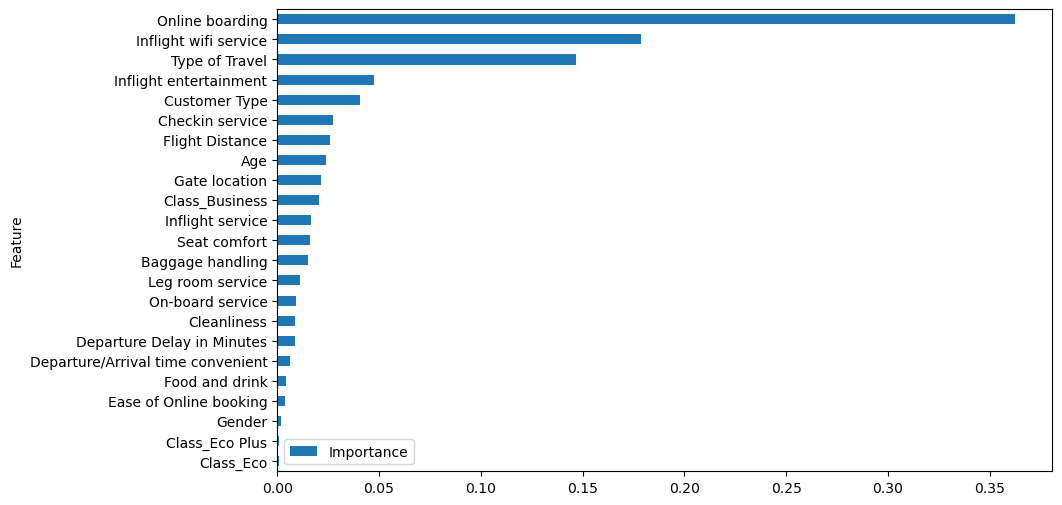

In [52]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train_k_best,y_train_k_best)
coefficients = model_DT.feature_importances_
features_imp_DT = pd.DataFrame({'Feature': x_train_k_best.columns, 'Importance': np.abs(coefficients)})
features_imp_DT = features_imp_DT.sort_values('Importance', ascending=True)
features_imp_DT.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


The GaussianNB does not offer an intrinsic method to evaluate feature importances. Naïve Bayes methods work by determining the conditional and unconditional probabilities associated with the features and predict the class with the highest probability. Thus, there are no coefficients computed or associated with the features you used to train the model 

<Axes: ylabel='Feature'>

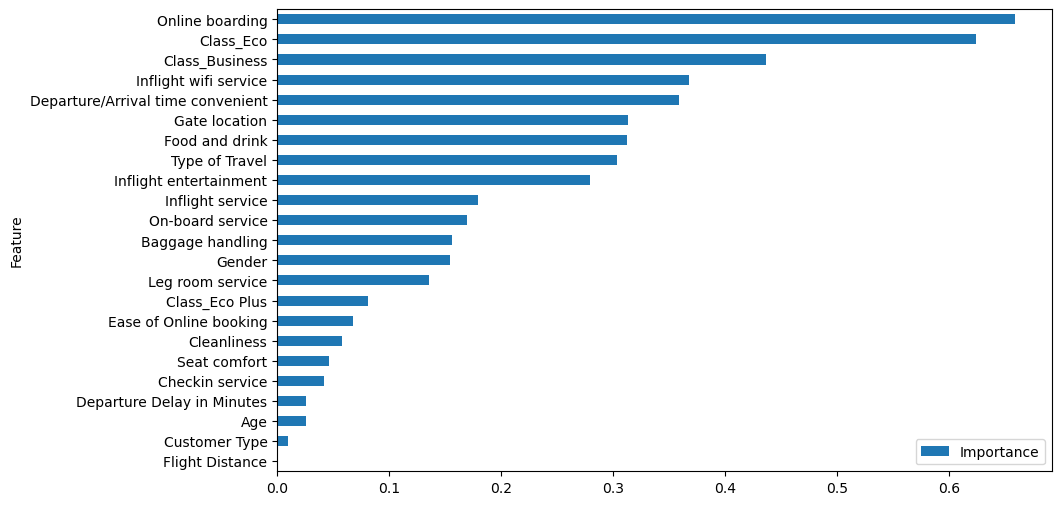

In [53]:
model_LR = LogisticRegression()
model_LR.fit(x_train_k_best,y_train_k_best)
coefficients = model_LR.coef_[0]
features_imp_LR = pd.DataFrame({'Feature': x_train_k_best.columns, 'Importance': np.abs(coefficients)})
features_imp_LR = features_imp_LR.sort_values('Importance', ascending=True)
features_imp_LR.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


<Axes: ylabel='Feature'>

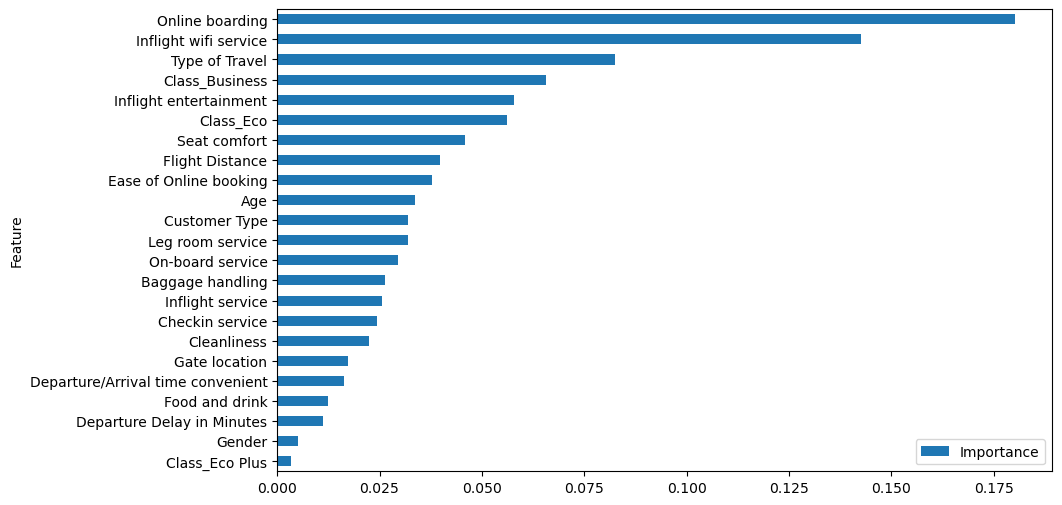

In [54]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train_k_best,y_train_k_best)
coefficients = model_RF.feature_importances_
features_imp_RF = pd.DataFrame({'Feature': x_train_k_best.columns, 'Importance': np.abs(coefficients)})
features_imp_RF = features_imp_RF.sort_values('Importance', ascending=True)
features_imp_RF.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


<Axes: ylabel='Feature'>

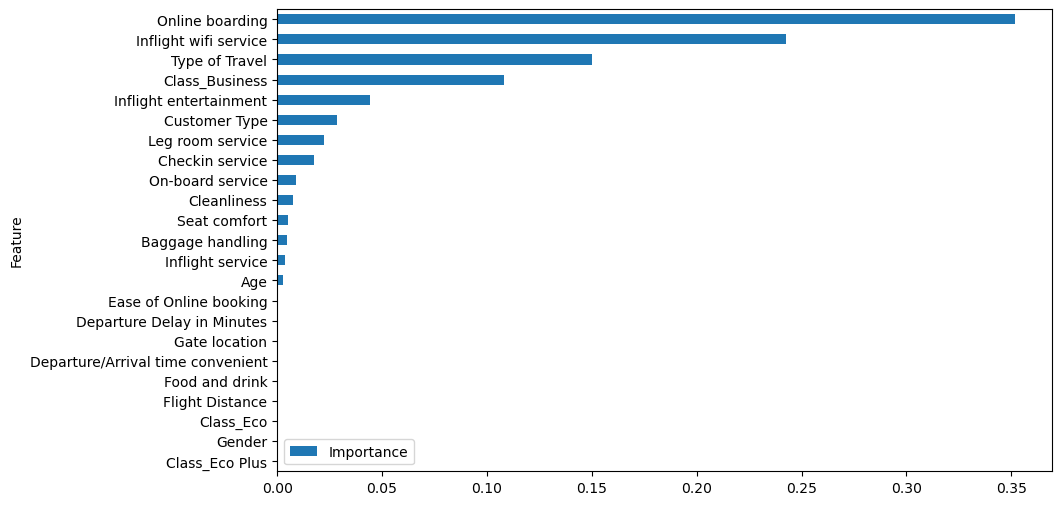

In [55]:
model_GBC = GradientBoostingClassifier()
model_GBC.fit(x_train_k_best,y_train_k_best)
coefficients = model_GBC.feature_importances_
features_imp_GBC = pd.DataFrame({'Feature': x_train_k_best.columns, 'Importance': np.abs(coefficients)})
features_imp_GBC = features_imp_GBC.sort_values('Importance', ascending=True)
features_imp_GBC.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


<Axes: ylabel='Feature'>

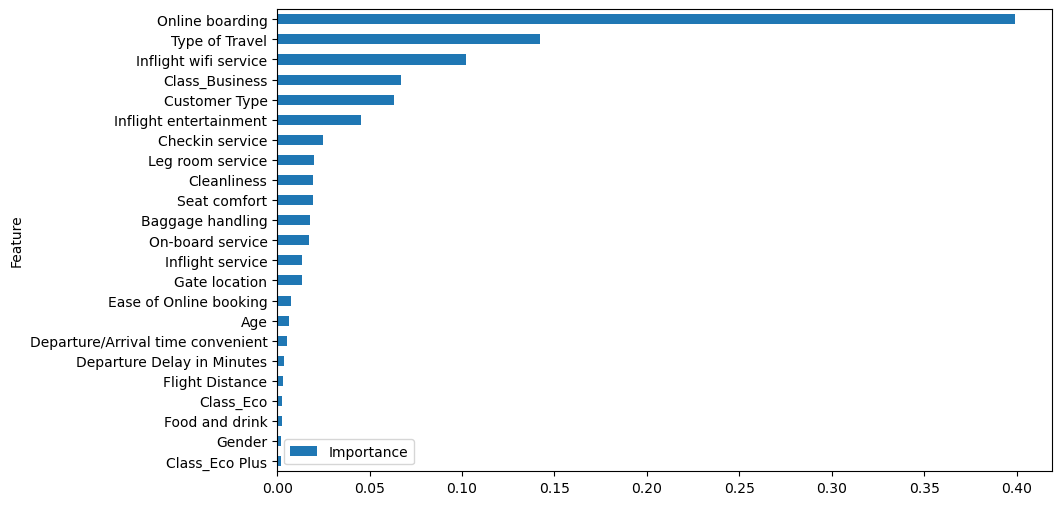

In [56]:
model_XGBC = XGBClassifier()
model_XGBC.fit(x_train_k_best,y_train_k_best)
coefficients = model_XGBC.feature_importances_
features_imp_XGBC = pd.DataFrame({'Feature': x_train_k_best.columns, 'Importance': np.abs(coefficients)})
features_imp_XGBC = features_imp_XGBC.sort_values('Importance', ascending=True)
features_imp_XGBC.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

# Hyperparameter tuning

Grid search - specify a list of hyperparameters and a performance metric, the algorithm works through all possible combinations to determine the best fit.


# Decision Trees

In [57]:
# DT
parameters_dt = {
    "max_depth": [3, 5, 7, 9, 11, 13],
    "max_features": [2, 5, 8, 10],
    "min_samples_split": [2, 5, 7, 9],
    "criterion": ["gini", "entropy"]
}

model_dt = DecisionTreeClassifier(random_state=42)

model_dt = GridSearchCV(
    model_dt, 
    parameters_dt, 
    cv=5,
    scoring='accuracy'
)

model_dt.fit(x_train, y_train)
dt_params = model_dt.best_params_
print('Best parameters', dt_params)
print(f'Mean cross-validated accuracy score of the best_estimator: ' + f'{model_dt.best_score_:.4f}')


Best parameters {'criterion': 'entropy', 'max_depth': 13, 'max_features': 10, 'min_samples_split': 2}
Mean cross-validated accuracy score of the best_estimator: 0.9478


# Logistic Regression

In [58]:
# LR
parameters_lr = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_lr = LogisticRegression(
    random_state=42,
    solver="liblinear",
)

model_lr = GridSearchCV(
    model_lr, 
    parameters_lr, 
    cv=5,
    scoring='accuracy'
)

model_lr.fit(x_train, y_train)
lr_params = model_lr.best_params_
print('Best parameters', lr_params)
print(f'Mean cross-validated accuracy score of the best_estimator: ' + f'{model_lr.best_score_:.4f}')


Best parameters {'C': 0.1, 'penalty': 'l1'}
Mean cross-validated accuracy score of the best_estimator: 0.8748


# Random Forest

In [60]:
# RF
parameters_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model_rf = RandomForestClassifier(random_state=42)

model_rf = GridSearchCV(
    model_rf,
    parameters_rf,
    cv=5,
    scoring='accuracy'
)

model_rf.fit(x_train, y_train)

# Get the best estimator and its parameters
#rf_classifier = model_rf.best_estimator_
rf_params = model_rf.best_params_

# Evaluate the best classifier on the test set
#y_pred = best_classifier.predict(X_test_scaled)
#accuracy = accuracy_score(Y_test, y_pred)
print('Best parameters:', rf_params)
print(f'Mean cross-validated accuracy score of the best_estimator: ' + f'{model_rf.best_score_:.4f}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean cross-validated accuracy score of the best_estimator: 0.9623


# Gradient Boosting

In [96]:
# GB
parameters_gb = {
    'max_depth': [9], 
    'n_estimators': [100],
    'learning_rate': [0.1]
}
model_gb = GradientBoostingClassifier(random_state=42)

model_gb = GridSearchCV(
    model_gb,
    parameters_gb,
    cv=5,
    scoring='accuracy'
)
model_gb.fit(x_train, y_train)

gb_params = model_gb.best_params_
print('Best parameters:', gb_params)
print(f'Mean cross-validated accuracy score of the best_estimator: ' + f'{model_gb.best_score_:.4f}')

Best parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
Mean cross-validated accuracy score of the best_estimator: 0.9634


# eXtreme Gradient Boosting

In [62]:
# XGB
parameters_xgb = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}

model_xgb = XGBClassifier(random_state=42)
model_xgb = GridSearchCV(
    model_xgb, 
    parameters_xgb, 
    cv=5,
    scoring='accuracy'
)
model_xgb.fit(x_train, y_train)
xgb_params = model_xgb.best_params_
print('Best parameters', xgb_params)
print(f'Mean cross-validated accuracy score of the best_estimator: ' + f'{model_xgb.best_score_:.4f}')

Best parameters {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
Mean cross-validated accuracy score of the best_estimator: 0.9638


# Modelling with Selected Important Features and Hyperparameter Tuning

In [70]:
import time
# Evaluate a score by cross-validation. It uses default 5-fold cross validation((Stratified)KFold)
def prediction_metrics (model, x_train, x_test):
    
    t0 = time.time()
    model.fit(x_train, y_train)
    print("Training time:", time.time()-t0)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    
    plt.figure(1,figsize=(12,5))
    
    plt.subplot(121)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    
    plt.subplot(122)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label='AUROC Curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    
    plt.show()
    
    return (acc_score, precision, recall, F1_score, auc)

In [64]:
train_val_metrics = {}
test_metrics = {}

# Decision Trees

In [65]:
# DT Classifier with top important features whose score is greater than 0.02
select_features = features_imp_DT['Importance'] > 0.02
x_train_DT = x_train[features_imp_DT[select_features].Feature]
x_train_DT.head()

,Class_Business,Gate location,Age,Flight Distance,Checkin service,Customer Type,Inflight entertainment,Type of Travel,Inflight wifi service,Online boarding
0,-0.956897,-1.547319,-1.745269,-0.734872,0.549789,0.472769,1.231704,-1.490603,0.203588,-0.185526
1,1.045045,0.018110,-0.951353,-0.962577,-1.821089,-2.115196,-1.769070,0.670869,0.203588,-0.185526
2,1.045045,-0.764605,-0.885194,-0.044674,0.549789,0.472769,1.231704,0.670869,-0.549524,1.296497
3,1.045045,1.583538,-0.951353,-0.631646,-1.821089,0.472769,-1.018876,0.670869,-0.549524,-0.926537
4,1.045045,0.018110,1.430394,-0.983829,-0.240504,0.472769,-0.268683,0.670869,0.203588,1.296497


In [66]:
x_test_DT = x_test[features_imp_DT[select_features].Feature]
x_test_DT.head()

,Class_Business,Gate location,Age,Flight Distance,Checkin service,Customer Type,Inflight entertainment,Type of Travel,Inflight wifi service,Online boarding
0,-0.962736,0.797831,0.817887,-1.035171,-1.035348,0.476040,1.227138,0.663378,1.703853,0.544692
1,1.038707,-1.542065,-0.239238,1.671443,-0.247517,0.476040,0.479907,0.663378,-1.291598,0.544692
2,-0.962736,0.797831,-1.296363,-1.003128,-1.035348,-2.100665,-1.014556,0.663378,-0.542735,-0.930768
3,1.038707,-0.762100,0.289325,2.186131,-0.247517,0.476040,-1.761787,0.663378,-2.040460,0.544692
4,-0.962736,0.017866,0.619676,-0.011804,0.540315,0.476040,-1.014556,0.663378,-0.542735,-1.668498


Training time: 0.13904380798339844


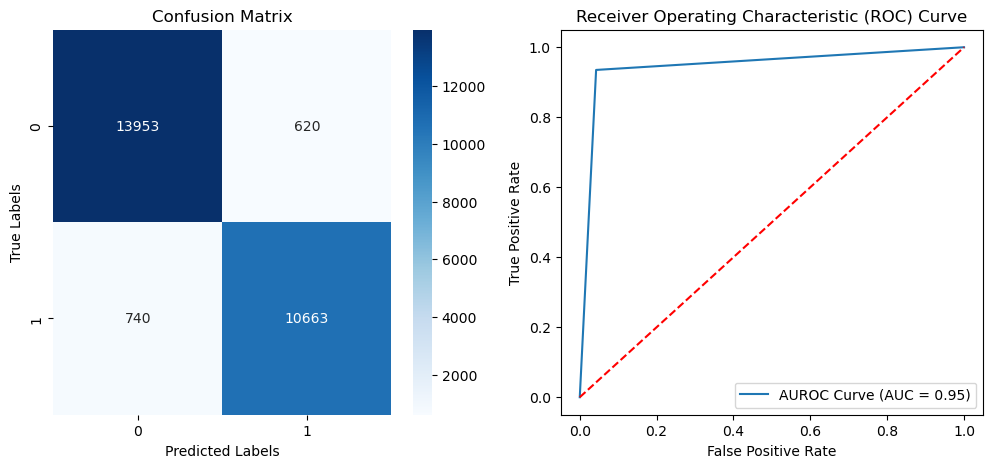

In [71]:
# DT Classifier with best hyperparameters - 'criterion': 'entropy', 'max_depth': 13, 'max_features': 10, 'min_samples_split': 2
model_DT = DecisionTreeClassifier(criterion = 'entropy', max_depth= 13, max_features= 10, min_samples_split= 2)
acc_score, precision, recall, F1_score, auc = model_metrics(model_DT, x_train_DT, y_train)
train_val_metrics.update({'Decision Trees':[acc_score, precision, recall, F1_score, auc]})
acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts = prediction_metrics(model_DT, x_train_DT, x_test_DT)
test_metrics.update({'Decision Trees':[acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts]})

# Logistic Regression

In [72]:
#LR with top important features whose score is greater than 0.15
select_features = features_imp_LR['Importance'] > 0.15
x_train_LR = x_train[features_imp_LR[select_features].Feature]
x_train_LR.head()

,Gender,Baggage handling,On-board service,Inflight service,Inflight entertainment,Type of Travel,Food and drink,Gate location,Departure/Arrival time convenient,Inflight wifi service,Class_Business,Class_Eco,Online boarding
0,-1.015021,0.311762,0.479405,1.156437,1.231704,-1.490603,1.352260,-1.547319,0.616186,0.203588,-0.956897,-0.904334,-0.185526
1,-1.015021,-0.535048,-1.849149,0.305832,-1.769070,0.670869,-1.656356,0.018110,-0.695235,0.203588,1.045045,-0.904334,-0.185526
2,0.985201,0.311762,0.479405,0.305832,1.231704,0.670869,1.352260,-0.764605,-0.695235,-0.549524,1.045045,-0.904334,1.296497
3,0.985201,-0.535048,-1.072964,0.305832,-1.018876,0.670869,-0.904202,1.583538,1.271896,-0.549524,1.045045,-0.904334,-0.926537
4,-1.015021,0.311762,-0.296779,-0.544772,-0.268683,0.670869,0.600106,0.018110,-0.039525,0.203588,1.045045,-0.904334,1.296497


In [73]:
x_test_LR = x_test[features_imp_LR[select_features].Feature]
x_test_LR.head()

,Gender,Baggage handling,On-board service,Inflight service,Inflight entertainment,Type of Travel,Food and drink,Gate location,Departure/Arrival time convenient,Inflight wifi service,Class_Business,Class_Eco,Online boarding
0,0.985932,1.161716,1.259170,1.144063,1.227138,0.663378,-0.161739,0.797831,0.621641,1.703853,-0.962736,1.116370,0.544692
1,0.985932,0.311739,0.479178,0.297077,0.479907,0.663378,1.340348,-1.542065,-1.334871,-1.291598,1.038707,-0.895761,0.544692
2,-1.014269,-0.538238,0.479178,-1.396893,-1.014556,0.663378,-0.912783,0.797831,-1.987042,-0.542735,-0.962736,1.116370,-0.930768
3,-1.014269,-2.238193,-1.860800,-2.243878,-1.761787,0.663378,-0.161739,-0.762100,-1.987042,-2.040460,1.038707,-0.895761,0.544692
4,0.985932,-1.388216,-1.080807,-1.396893,-1.014556,0.663378,0.589304,0.017866,-0.030530,-0.542735,-0.962736,1.116370,-1.668498


Training time: 0.19768691062927246


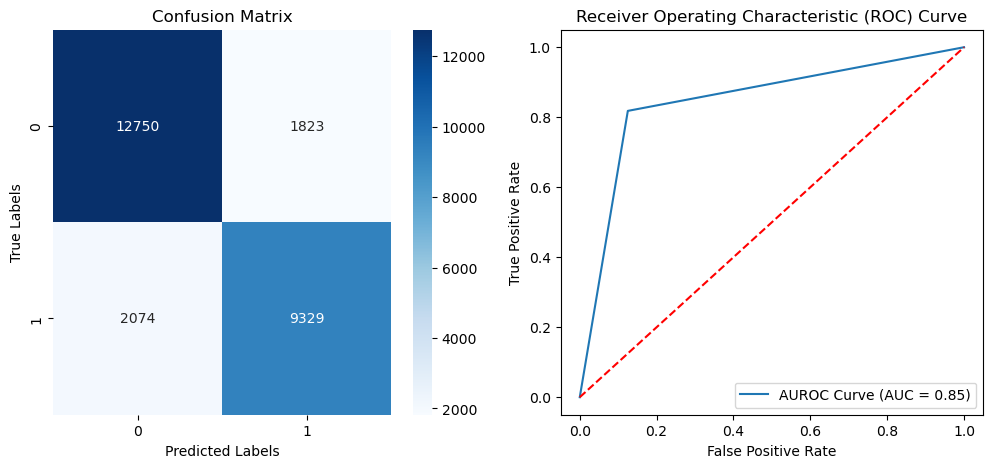

In [74]:
# LR Classifier with best hyperparameters - 'C': 0.1, 'penalty': 'l1'
model_LR = LogisticRegression(C = 0.1, penalty = 'l1', solver='liblinear')
acc_score, precision, recall, F1_score, auc = model_metrics(model_LR, x_train_LR, y_train)
train_val_metrics.update({'Logistic Regression':[acc_score, precision, recall, F1_score, auc]})
acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts = prediction_metrics(model_LR, x_train_LR, x_test_LR)
test_metrics.update({'Logistic Regression':[acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts]})

# Guassian Naive Bayes

In [75]:
# NB classifier with top 15 most important features we got from SelectKBest
x_train_NB = x_train[kFeatures.get_feature_names_out()]
x_train_NB.head()

,Age,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Checkin service,Cleanliness,Departure Delay in Minutes,Type of Travel,Class_Business,Class_Eco
0,-1.745269,-0.734872,0.203588,1.352260,-0.185526,1.183107,1.231704,0.479405,-0.266842,0.549789,1.305879,1.568467,-1.490603,-0.956897,-0.904334
1,-0.951353,-0.962577,0.203588,-1.656356,-0.185526,-1.849391,-1.769070,-1.849149,1.253372,-1.821089,-1.742360,-0.569875,0.670869,1.045045,-0.904334
2,-0.885194,-0.044674,-0.549524,1.352260,1.296497,1.183107,1.231704,0.479405,-0.266842,0.549789,1.305879,-0.658973,0.670869,1.045045,-0.904334
3,-0.951353,-0.631646,-0.549524,-0.904202,-0.926537,-1.091267,-1.018876,-1.072964,1.253372,-1.821089,-0.980300,0.321101,0.670869,1.045045,-0.904334
4,1.430394,-0.983829,0.203588,0.600106,1.296497,1.183107,-0.268683,-0.296779,0.493265,-0.240504,-0.218241,-0.658973,0.670869,1.045045,-0.904334


In [76]:
x_test_NB = x_test[kFeatures.get_feature_names_out()]
x_test_NB.head()

,Age,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Checkin service,Cleanliness,Departure Delay in Minutes,Type of Travel,Class_Business,Class_Eco
0,0.817887,-1.035171,1.703853,-0.161739,0.544692,-0.340303,1.227138,1.259170,1.250974,-1.035348,1.298998,0.953810,0.663378,-0.962736,1.116370
1,-0.239238,1.671443,-1.291598,1.340348,0.544692,1.174774,0.479907,0.479178,0.492730,-0.247517,1.298998,-0.382286,0.663378,1.038707,-0.895761
2,-1.296363,-1.003128,-0.542735,-0.912783,-0.930768,-1.097842,-1.014556,0.479178,-1.782001,-1.035348,-0.974927,-0.382286,0.663378,-0.962736,1.116370
3,0.289325,2.186131,-2.040460,-0.161739,0.544692,0.417235,-1.761787,-1.860800,-1.782001,-0.247517,0.541023,-0.382286,0.663378,1.038707,-0.895761
4,0.619676,-0.011804,-0.542735,0.589304,-1.668498,-1.097842,-1.014556,-1.080807,-1.023758,0.540315,0.541023,-0.382286,0.663378,-0.962736,1.116370


Training time: 0.010295867919921875


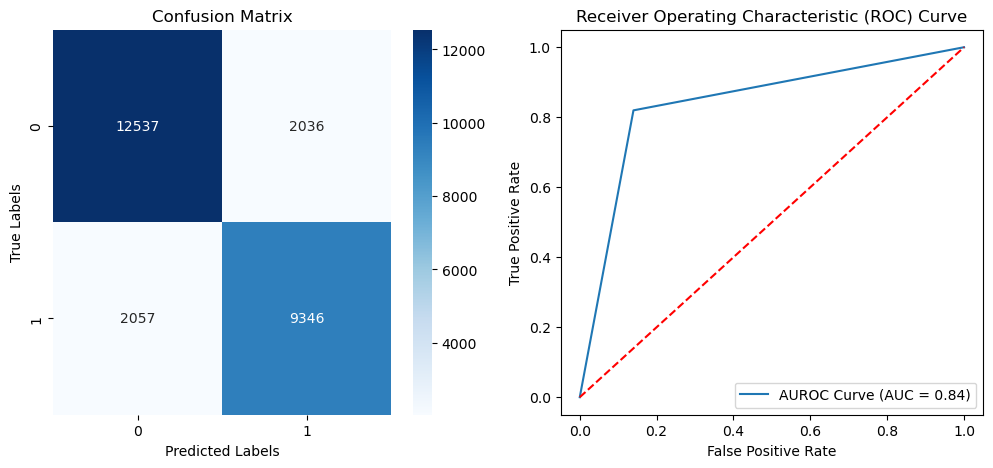

In [77]:
# Gaussian Naive Bayes
model_GB = GaussianNB()
acc_score, precision, recall, F1_score, auc = model_metrics(model_GB, x_train_NB, y_train)
train_val_metrics.update({'Gaussian Naive Bayes':[acc_score, precision, recall, F1_score, auc]})
acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts = prediction_metrics(model_GB, x_train_NB, x_test_NB)
test_metrics.update({'Gaussian Naive Bayes':[acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts]})

# Random Forest

In [78]:
#RF with top important features whose score is greater than 0.02
select_features = features_imp_RF['Importance'] > 0.02
x_train_RF = x_train[features_imp_RF[select_features].Feature]
x_train_RF.head()

,Cleanliness,Checkin service,Inflight service,Baggage handling,On-board service,Leg room service,Customer Type,Age,Ease of Online booking,Flight Distance,Seat comfort,Class_Eco,Inflight entertainment,Class_Business,Type of Travel,Inflight wifi service,Online boarding
0,1.305879,0.549789,1.156437,0.311762,0.479405,-0.266842,0.472769,-1.745269,0.173793,-0.734872,1.183107,-0.904334,1.231704,-0.956897,-1.490603,0.203588,-0.185526
1,-1.742360,-1.821089,0.305832,-0.535048,-1.849149,1.253372,-2.115196,-0.951353,0.173793,-0.962577,-1.849391,-0.904334,-1.769070,1.045045,0.670869,0.203588,-0.185526
2,1.305879,0.549789,0.305832,0.311762,0.479405,-0.266842,0.472769,-0.885194,-0.541048,-0.044674,1.183107,-0.904334,1.231704,1.045045,0.670869,-0.549524,1.296497
3,-0.980300,-1.821089,0.305832,-0.535048,-1.072964,1.253372,0.472769,-0.951353,1.603475,-0.631646,-1.091267,-0.904334,-1.018876,1.045045,0.670869,-0.549524,-0.926537
4,-0.218241,-0.240504,-0.544772,0.311762,-0.296779,0.493265,0.472769,1.430394,0.173793,-0.983829,1.183107,-0.904334,-0.268683,1.045045,0.670869,0.203588,1.296497


In [79]:
x_test_RF = x_test[features_imp_RF[select_features].Feature]
x_test_RF.head()

,Cleanliness,Checkin service,Inflight service,Baggage handling,On-board service,Leg room service,Customer Type,Age,Ease of Online booking,Flight Distance,Seat comfort,Class_Eco,Inflight entertainment,Class_Business,Type of Travel,Inflight wifi service,Online boarding
0,1.298998,-1.035348,1.144063,1.161716,1.259170,1.250974,0.476040,0.817887,0.172143,-1.035171,-0.340303,1.116370,1.227138,-0.962736,0.663378,1.703853,0.544692
1,1.298998,-0.247517,0.297077,0.311739,0.479178,0.492730,0.476040,-0.239238,0.172143,1.671443,1.174774,-0.895761,0.479907,1.038707,0.663378,-1.291598,0.544692
2,-0.974927,-1.035348,-1.396893,-0.538238,0.479178,-1.782001,-2.100665,-1.296363,-0.535609,-1.003128,-1.097842,1.116370,-1.014556,-0.962736,0.663378,-0.542735,-0.930768
3,0.541023,-0.247517,-2.243878,-2.238193,-1.860800,-1.782001,0.476040,0.289325,-1.951114,2.186131,0.417235,-0.895761,-1.761787,1.038707,0.663378,-2.040460,0.544692
4,0.541023,0.540315,-1.396893,-1.388216,-1.080807,-1.023758,0.476040,0.619676,0.879895,-0.011804,-1.097842,1.116370,-1.014556,-0.962736,0.663378,-0.542735,-1.668498


Training time: 11.18871283531189


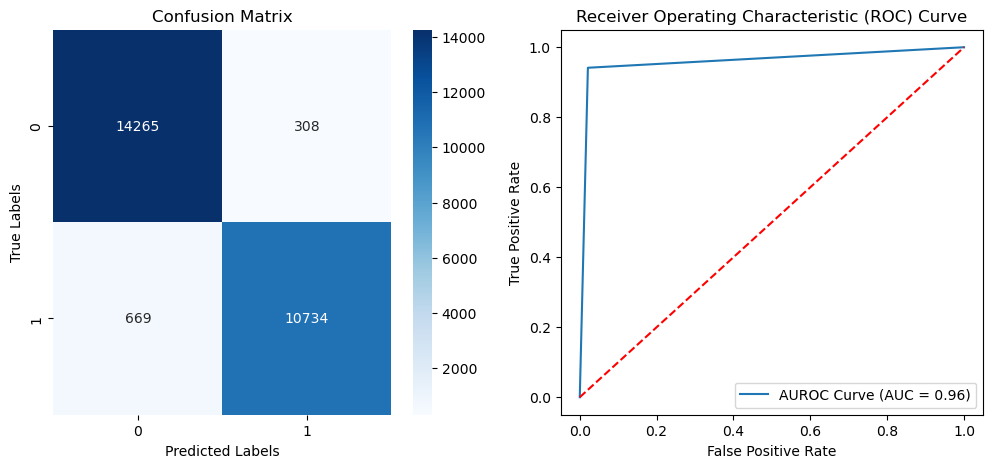

In [80]:
# RF Classifier with best hyperparameters - 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200
model_RF = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_leaf = 1, min_samples_split = 5)
acc_score, precision, recall, F1_score, auc = model_metrics(model_RF, x_train_RF, y_train)
train_val_metrics.update({'Random Forest':[acc_score, precision, recall, F1_score, auc]})
acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts = prediction_metrics(model_RF, x_train_RF, x_test_RF)
test_metrics.update({'Random Forest':[acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts]})

# Gradient Boosting

In [81]:
#GB with top important features whose score is greater than 0.005
select_features = features_imp_GBC['Importance'] > 0.005
x_train_GB = x_train[features_imp_GBC[select_features].Feature]
x_train_GB.head()

,Seat comfort,Cleanliness,On-board service,Checkin service,Leg room service,Customer Type,Inflight entertainment,Class_Business,Type of Travel,Inflight wifi service,Online boarding
0,1.183107,1.305879,0.479405,0.549789,-0.266842,0.472769,1.231704,-0.956897,-1.490603,0.203588,-0.185526
1,-1.849391,-1.742360,-1.849149,-1.821089,1.253372,-2.115196,-1.769070,1.045045,0.670869,0.203588,-0.185526
2,1.183107,1.305879,0.479405,0.549789,-0.266842,0.472769,1.231704,1.045045,0.670869,-0.549524,1.296497
3,-1.091267,-0.980300,-1.072964,-1.821089,1.253372,0.472769,-1.018876,1.045045,0.670869,-0.549524,-0.926537
4,1.183107,-0.218241,-0.296779,-0.240504,0.493265,0.472769,-0.268683,1.045045,0.670869,0.203588,1.296497


In [82]:
x_test_GB = x_test[features_imp_GBC[select_features].Feature]
x_test_GB.head()

,Seat comfort,Cleanliness,On-board service,Checkin service,Leg room service,Customer Type,Inflight entertainment,Class_Business,Type of Travel,Inflight wifi service,Online boarding
0,-0.340303,1.298998,1.259170,-1.035348,1.250974,0.476040,1.227138,-0.962736,0.663378,1.703853,0.544692
1,1.174774,1.298998,0.479178,-0.247517,0.492730,0.476040,0.479907,1.038707,0.663378,-1.291598,0.544692
2,-1.097842,-0.974927,0.479178,-1.035348,-1.782001,-2.100665,-1.014556,-0.962736,0.663378,-0.542735,-0.930768
3,0.417235,0.541023,-1.860800,-0.247517,-1.782001,0.476040,-1.761787,1.038707,0.663378,-2.040460,0.544692
4,-1.097842,0.541023,-1.080807,0.540315,-1.023758,0.476040,-1.014556,-0.962736,0.663378,-0.542735,-1.668498


Training time: 10.678267002105713


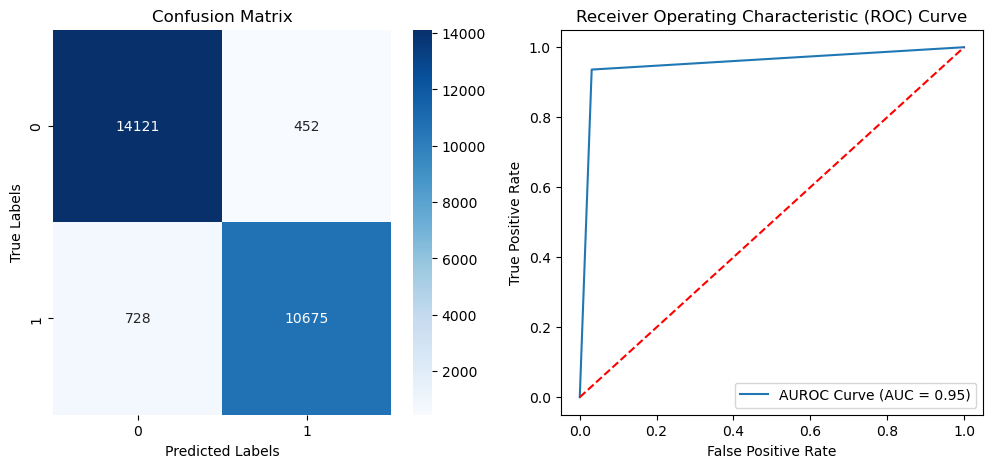

In [83]:
# GB Classifier with best hyperparameters - 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100
model_GB = GradientBoostingClassifier(n_estimators = 100, max_depth = 9, learning_rate = 0.1)
acc_score, precision, recall, F1_score, auc = model_metrics(model_GB, x_train_GB, y_train)
train_val_metrics.update({'Gradient Boosting':[acc_score, precision, recall, F1_score, auc]})
acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts = prediction_metrics(model_GB, x_train_GB, x_test_GB)
test_metrics.update({'Gradient Boosting':[acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts]})

# eXtreme Gradient Boosting

In [84]:
#XGB with top important features whose score is greater than 0.005
select_features = features_imp_XGBC['Importance'] > 0.005
x_train_XGB = x_train[features_imp_XGBC[select_features].Feature]
x_train_XGB.head()

,Departure/Arrival time convenient,Age,Ease of Online booking,Gate location,Inflight service,On-board service,Baggage handling,Seat comfort,Cleanliness,Leg room service,Checkin service,Inflight entertainment,Customer Type,Class_Business,Inflight wifi service,Type of Travel,Online boarding
0,0.616186,-1.745269,0.173793,-1.547319,1.156437,0.479405,0.311762,1.183107,1.305879,-0.266842,0.549789,1.231704,0.472769,-0.956897,0.203588,-1.490603,-0.185526
1,-0.695235,-0.951353,0.173793,0.018110,0.305832,-1.849149,-0.535048,-1.849391,-1.742360,1.253372,-1.821089,-1.769070,-2.115196,1.045045,0.203588,0.670869,-0.185526
2,-0.695235,-0.885194,-0.541048,-0.764605,0.305832,0.479405,0.311762,1.183107,1.305879,-0.266842,0.549789,1.231704,0.472769,1.045045,-0.549524,0.670869,1.296497
3,1.271896,-0.951353,1.603475,1.583538,0.305832,-1.072964,-0.535048,-1.091267,-0.980300,1.253372,-1.821089,-1.018876,0.472769,1.045045,-0.549524,0.670869,-0.926537
4,-0.039525,1.430394,0.173793,0.018110,-0.544772,-0.296779,0.311762,1.183107,-0.218241,0.493265,-0.240504,-0.268683,0.472769,1.045045,0.203588,0.670869,1.296497


In [85]:
x_test_XGB = x_test[features_imp_XGBC[select_features].Feature]
x_test_XGB.head()

,Departure/Arrival time convenient,Age,Ease of Online booking,Gate location,Inflight service,On-board service,Baggage handling,Seat comfort,Cleanliness,Leg room service,Checkin service,Inflight entertainment,Customer Type,Class_Business,Inflight wifi service,Type of Travel,Online boarding
0,0.621641,0.817887,0.172143,0.797831,1.144063,1.259170,1.161716,-0.340303,1.298998,1.250974,-1.035348,1.227138,0.476040,-0.962736,1.703853,0.663378,0.544692
1,-1.334871,-0.239238,0.172143,-1.542065,0.297077,0.479178,0.311739,1.174774,1.298998,0.492730,-0.247517,0.479907,0.476040,1.038707,-1.291598,0.663378,0.544692
2,-1.987042,-1.296363,-0.535609,0.797831,-1.396893,0.479178,-0.538238,-1.097842,-0.974927,-1.782001,-1.035348,-1.014556,-2.100665,-0.962736,-0.542735,0.663378,-0.930768
3,-1.987042,0.289325,-1.951114,-0.762100,-2.243878,-1.860800,-2.238193,0.417235,0.541023,-1.782001,-0.247517,-1.761787,0.476040,1.038707,-2.040460,0.663378,0.544692
4,-0.030530,0.619676,0.879895,0.017866,-1.396893,-1.080807,-1.388216,-1.097842,0.541023,-1.023758,0.540315,-1.014556,0.476040,-0.962736,-0.542735,0.663378,-1.668498


Training time: 18.770753860473633


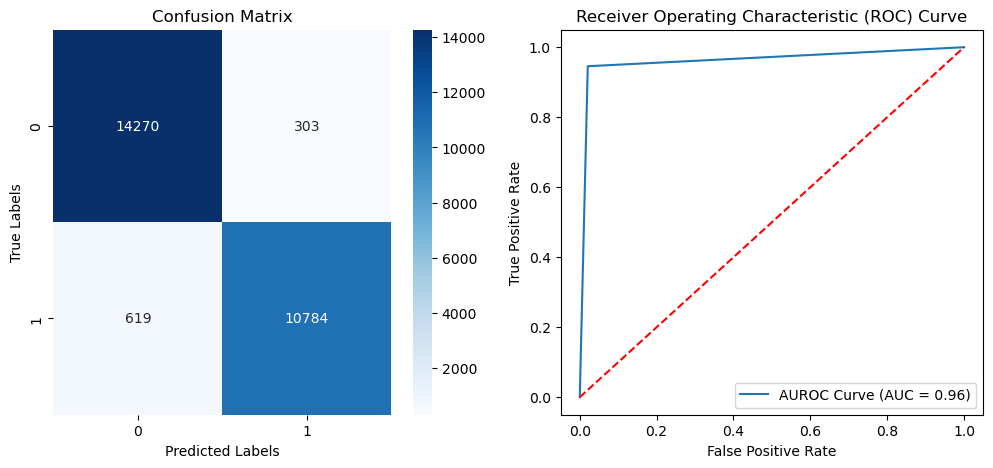

In [86]:
# XGB Classifier with best hyperparameters - 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100
model_XGB = XGBClassifier(n_estimators = 100, max_depth = 9, learning_rate = 0.1)
acc_score, precision, recall, F1_score, auc = model_metrics(model_XGB, x_train_XGB, y_train)
train_val_metrics.update({'eXtreme GB':[acc_score, precision, recall, F1_score, auc]})
acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts = prediction_metrics(model_GB, x_train_XGB, x_test_XGB)
test_metrics.update({'eXtreme GB':[acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts]})

In [87]:
train_val_metrics_comparison = pd.DataFrame(train_val_metrics,index=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
train_val_metrics_comparison

,Decision Trees,Logistic Regression,Gaussian Naive Bayes,Random Forest,Gradient Boosting,eXtreme GB
Accuracy,0.946633,0.852430,0.848118,0.962494,0.951792,0.963784
Precision,0.943651,0.836945,0.825439,0.973517,0.954872,0.973258
Recall,0.932615,0.819100,0.823698,0.939123,0.932549,0.942321
F1,0.938211,0.827906,0.824558,0.956241,0.943768,0.957537
AUC,0.944959,0.848481,0.845245,0.959858,0.949533,0.961259


In [88]:
test_metrics_comparison = pd.DataFrame(test_metrics,index=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
test_metrics_comparison

,Decision Trees,Logistic Regression,Gaussian Naive Bayes,Random Forest,Gradient Boosting,eXtreme GB
Accuracy,0.947644,0.849977,0.842431,0.962388,0.954573,0.964506
Precision,0.945050,0.836532,0.821121,0.972107,0.959378,0.972671
Recall,0.935105,0.818118,0.819609,0.941331,0.936157,0.945716
F1,0.940051,0.827222,0.820364,0.956471,0.947625,0.959004
AUC,0.946280,0.846512,0.839949,0.960098,0.952570,0.962462


# AdaBoost

<Axes: ylabel='Feature'>

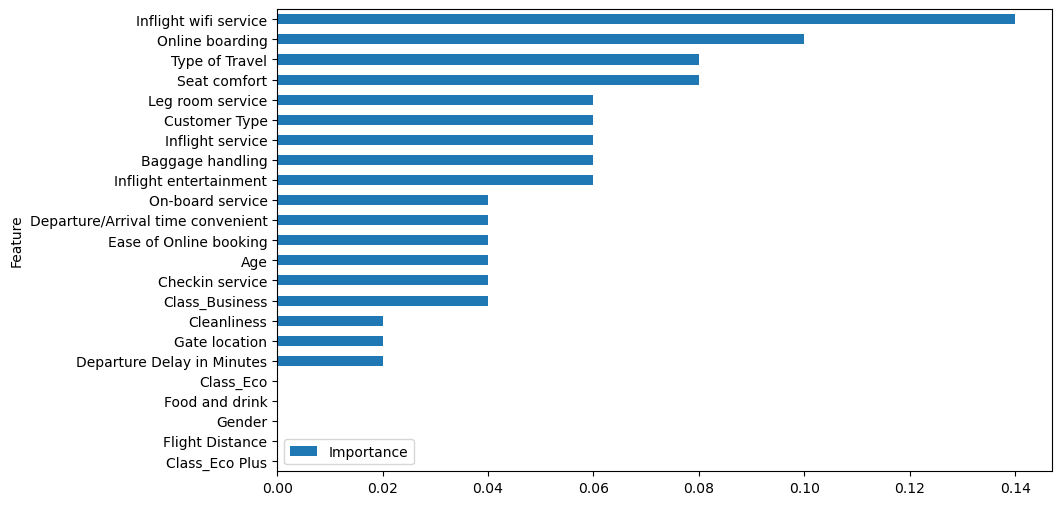

In [89]:
model_Ada = AdaBoostClassifier()
model_Ada.fit(x_train,y_train)
coefficients = model_Ada.feature_importances_
features_imp_Ada = pd.DataFrame({'Feature': x_train.columns, 'Importance': np.abs(coefficients)})
features_imp_Ada = features_imp_Ada.sort_values('Importance', ascending=True)
features_imp_Ada.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [90]:
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
    "learning_rate": [0.001, 0.01, 0.1, 1],
}

model_ada = AdaBoostClassifier(random_state=42)
model_ada = GridSearchCV(
    model_ada, 
    parameters, 
    cv=5,
    scoring='accuracy',
)
model_ada.fit(x_train, y_train)
ada_params = model_ada.best_params_
print('Best parameters', ada_params)
print(f'Mean cross-validated accuracy score of the best_estimator: ' + f'{model_ada.best_score_:.4f}')

Best parameters {'learning_rate': 1.0, 'n_estimators': 75}
Mean cross-validated accuracy score of the best_estimator: 0.9291


In [91]:
select_features = features_imp_Ada['Importance'] > 0.03
x_train_Ada = x_train[features_imp_Ada[select_features].Feature]
x_train_Ada.head()

,Class_Business,Checkin service,Age,Ease of Online booking,Departure/Arrival time convenient,On-board service,Inflight entertainment,Baggage handling,Inflight service,Customer Type,Leg room service,Seat comfort,Type of Travel,Online boarding,Inflight wifi service
0,-0.956897,0.549789,-1.745269,0.173793,0.616186,0.479405,1.231704,0.311762,1.156437,0.472769,-0.266842,1.183107,-1.490603,-0.185526,0.203588
1,1.045045,-1.821089,-0.951353,0.173793,-0.695235,-1.849149,-1.769070,-0.535048,0.305832,-2.115196,1.253372,-1.849391,0.670869,-0.185526,0.203588
2,1.045045,0.549789,-0.885194,-0.541048,-0.695235,0.479405,1.231704,0.311762,0.305832,0.472769,-0.266842,1.183107,0.670869,1.296497,-0.549524
3,1.045045,-1.821089,-0.951353,1.603475,1.271896,-1.072964,-1.018876,-0.535048,0.305832,0.472769,1.253372,-1.091267,0.670869,-0.926537,-0.549524
4,1.045045,-0.240504,1.430394,0.173793,-0.039525,-0.296779,-0.268683,0.311762,-0.544772,0.472769,0.493265,1.183107,0.670869,1.296497,0.203588


In [92]:
x_test_Ada = x_test[features_imp_Ada[select_features].Feature]
x_test_Ada.head()

,Class_Business,Checkin service,Age,Ease of Online booking,Departure/Arrival time convenient,On-board service,Inflight entertainment,Baggage handling,Inflight service,Customer Type,Leg room service,Seat comfort,Type of Travel,Online boarding,Inflight wifi service
0,-0.962736,-1.035348,0.817887,0.172143,0.621641,1.259170,1.227138,1.161716,1.144063,0.476040,1.250974,-0.340303,0.663378,0.544692,1.703853
1,1.038707,-0.247517,-0.239238,0.172143,-1.334871,0.479178,0.479907,0.311739,0.297077,0.476040,0.492730,1.174774,0.663378,0.544692,-1.291598
2,-0.962736,-1.035348,-1.296363,-0.535609,-1.987042,0.479178,-1.014556,-0.538238,-1.396893,-2.100665,-1.782001,-1.097842,0.663378,-0.930768,-0.542735
3,1.038707,-0.247517,0.289325,-1.951114,-1.987042,-1.860800,-1.761787,-2.238193,-2.243878,0.476040,-1.782001,0.417235,0.663378,0.544692,-2.040460
4,-0.962736,0.540315,0.619676,0.879895,-0.030530,-1.080807,-1.014556,-1.388216,-1.396893,0.476040,-1.023758,-1.097842,0.663378,-1.668498,-0.542735


Training time: 2.214923143386841


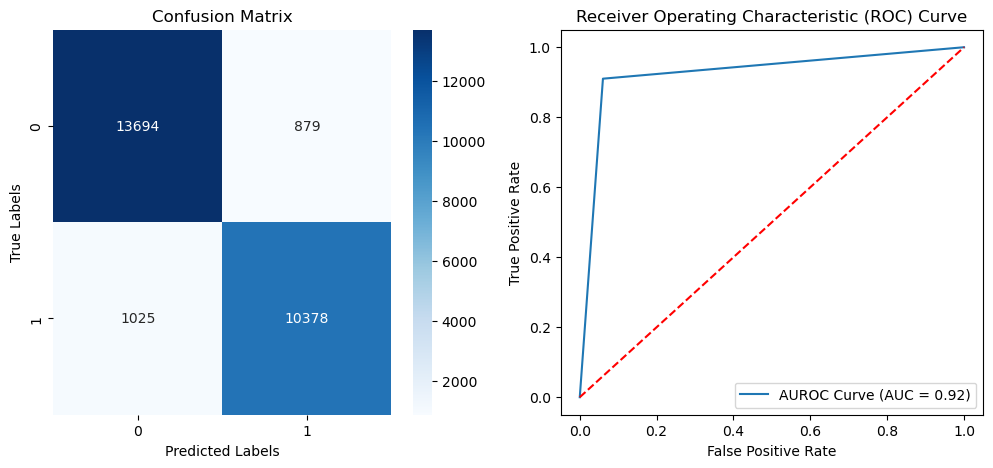

In [93]:
# Ada Boost Classifier with best hyperparameters - 'learning_rate': 1.0, 'n_estimators': 75
model_Ada = AdaBoostClassifier(n_estimators = 75, learning_rate = 1)
acc_score, precision, recall, F1_score, auc = model_metrics(model_Ada, x_train_Ada, y_train)
train_val_metrics.update({'AdaBoost':[acc_score, precision, recall, F1_score, auc]})
acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts = prediction_metrics(model_Ada, x_train_Ada, x_test_Ada)
test_metrics.update({'AdaBoost':[acc_score_ts, precision_ts, recall_ts, F1_score_ts, auc_ts]})

In [94]:
train_val_metrics_comparison = pd.DataFrame(train_val_metrics,index=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
train_val_metrics_comparison

,Decision Trees,Logistic Regression,Gaussian Naive Bayes,Random Forest,Gradient Boosting,eXtreme GB,AdaBoost
Accuracy,0.946633,0.852430,0.848118,0.962494,0.951792,0.963784,0.927788
Precision,0.943651,0.836945,0.825439,0.973517,0.954872,0.973258,0.924066
Recall,0.932615,0.819100,0.823698,0.939123,0.932549,0.942321,0.907984
F1,0.938211,0.827906,0.824558,0.956241,0.943768,0.957537,0.915949
AUC,0.944959,0.848481,0.845245,0.959858,0.949533,0.961259,0.925459


In [95]:
test_metrics_comparison = pd.DataFrame(test_metrics,index=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
test_metrics_comparison

,Decision Trees,Logistic Regression,Gaussian Naive Bayes,Random Forest,Gradient Boosting,eXtreme GB,AdaBoost
Accuracy,0.947644,0.849977,0.842431,0.962388,0.954573,0.964506,0.926702
Precision,0.945050,0.836532,0.821121,0.972107,0.959378,0.972671,0.921915
Recall,0.935105,0.818118,0.819609,0.941331,0.936157,0.945716,0.910111
F1,0.940051,0.827222,0.820364,0.956471,0.947625,0.959004,0.915975
AUC,0.946280,0.846512,0.839949,0.960098,0.952570,0.962462,0.924897
